In [35]:
from importlib import reload
import argparse
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

import gan

cuda = torch.cuda.is_available()

print("Cuda: " + str(cuda))
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

Cuda: True


Filename: generator_trainhack_441_100_5000


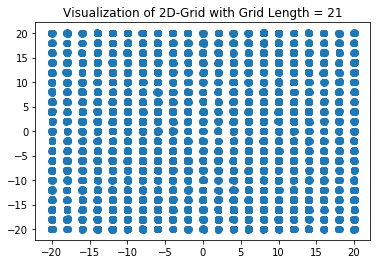

In [36]:
# experiment parameters
num_samples = 10000 # for plotting
num_epochs = 5000
num_samples_per_batch = 500
grid_length = 21
var = 0.0025
latent_dim = 2
layer_width = 100

filename = "generator_trainhack_%d_%d_%d" % (grid_length * grid_length, layer_width, num_epochs)
print("Filename: " + filename)

# here's what the 2D-Grid looks like
samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.title("Visualization of 2D-Grid with Grid Length = %d" % grid_length)
plt.scatter(*zip(*samples))

[Epoch 0/5000] [Discriminator Loss: 0.898407] [Generator Loss: 0.715429]


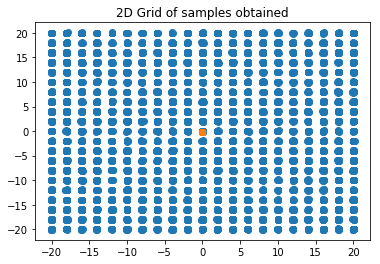

[Epoch 500/5000] [Discriminator Loss: 0.645008] [Generator Loss: 0.817486]


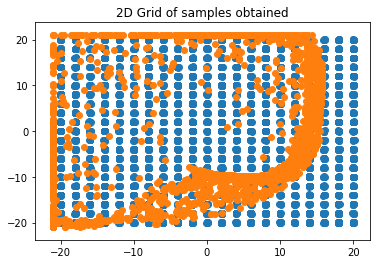

[Epoch 1000/5000] [Discriminator Loss: 0.695970] [Generator Loss: 0.685031]


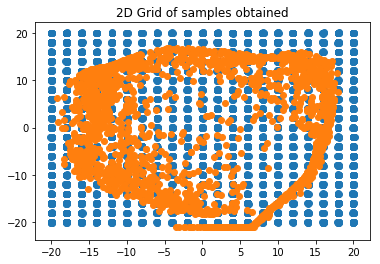

[Epoch 1500/5000] [Discriminator Loss: 0.690270] [Generator Loss: 0.728421]


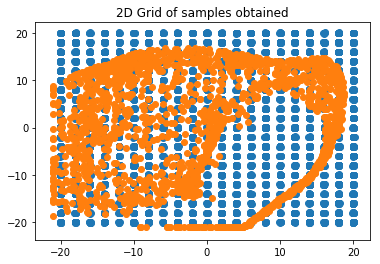

[Epoch 2000/5000] [Discriminator Loss: 0.691789] [Generator Loss: 0.689181]


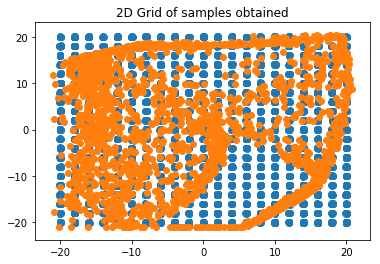

[Epoch 2500/5000] [Discriminator Loss: 0.695986] [Generator Loss: 0.674314]


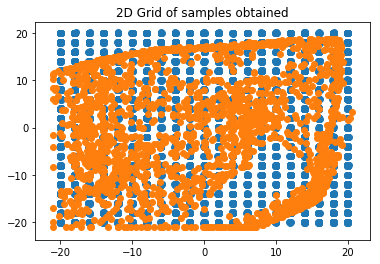

[Epoch 3000/5000] [Discriminator Loss: 0.695489] [Generator Loss: 0.695117]


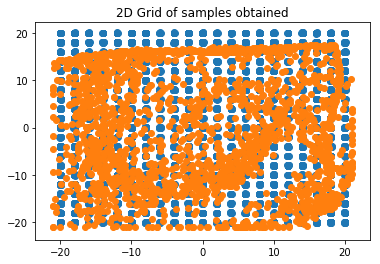

[Epoch 3500/5000] [Discriminator Loss: 0.692567] [Generator Loss: 0.693447]


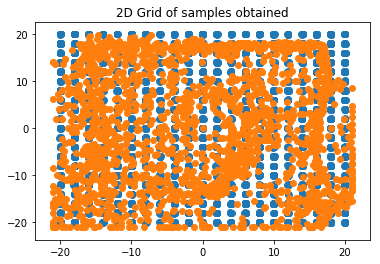

[Epoch 4000/5000] [Discriminator Loss: 0.697937] [Generator Loss: 0.682064]


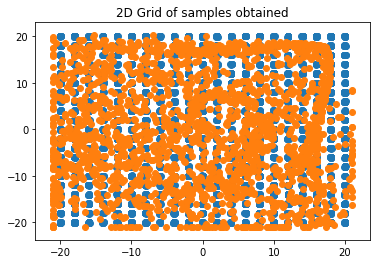

[Epoch 4500/5000] [Discriminator Loss: 0.693114] [Generator Loss: 0.685460]


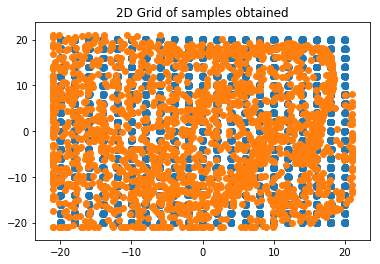

Grid length = 21


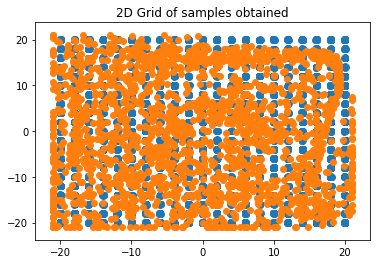

In [28]:
# run this cell only if you want to train a different GAN
gen = gan.train(save_model=True, filename=filename,
                num_samples=num_samples, num_epochs=num_epochs, 
                num_samples_per_batch=num_samples_per_batch, 
                grid_length=grid_length, var=var, latent_dim=latent_dim,
                layer_width=layer_width)

plt.clf()

# underlay of true distribution
real_samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.scatter(*zip(*real_samples))

# look at some samples
num_samples_to_test = 2000
z = Variable(Tensor(np.random.normal(0, 1, (num_samples_to_test, latent_dim))))
np_samples = gen(z).cpu().detach().numpy()
plt.title("2D Grid of samples obtained")
plt.scatter(*(zip(*np_samples)))

print("Grid length = %d" % grid_length)

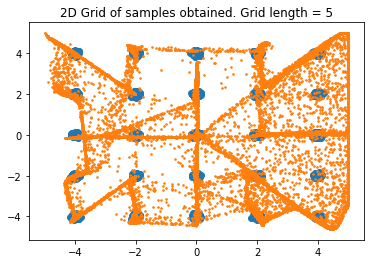

In [37]:
# load the model back and sample from it
# latent_dim = 2
# layer_width = 2
# loaded_gen = gan.load_model("good_generator_2018_07_11").eval()
# loaded_gen = gan.load_model("meh_generator_2018_07_11").eval()

# grid_length = 21 # this is the hack

grid_length = 5
filename = "generator_trainhack_25_100_5000"

loaded_gen = gan.load_model(filename, grid_length=grid_length, layer_width=layer_width).eval()

plt.clf()

real_samples = gan.sample_from_2dgrid(grid_length=grid_length, num_samples=num_samples)
plt.scatter(*zip(*real_samples))

num_samples_to_test = 20000
z = Variable(Tensor(np.random.normal(0, 1, (num_samples_to_test, latent_dim))))
np_samples = loaded_gen(z).cpu().detach().numpy()
plt.title("2D Grid of samples obtained. Grid length = %d" % grid_length)
plt.scatter(*zip(*np_samples), s=2.5)

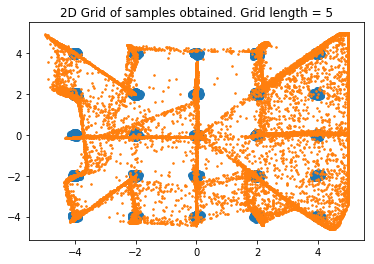

In [38]:
plt.clf()
gan.visualize_model(loaded_gen, latent_dim=latent_dim, grid_length=grid_length)
plt.savefig("2dgrid_example",bbox_inches="tight")

Cuda: True


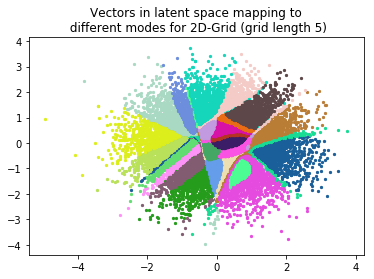

In [44]:
reload(gan)
plt.clf()
plt.tight_layout()

gan.visualize_latent_space(loaded_gen, latent_dim=latent_dim, grid_length=grid_length)
plt.savefig("latent_space_example",bbox_inches="tight")

432


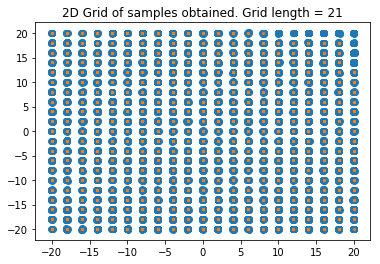

In [32]:
plt.clf()
s = gan.count_support_size(loaded_gen, latent_dim=latent_dim, grid_length=grid_length)
print(s)

In [34]:
num_trials = 1000
r = gan.gradient_free_avg_radius(loaded_gen, latent_dim=latent_dim, grid_length=grid_length, num_trials=num_trials)
print(r)

[Iteration 100] [Distance: 0.024637]
[Iteration 200] [Distance: 0.031945]
[Iteration 300] [Distance: 0.033214]
[Iteration 400] [Distance: 0.030203]
[Iteration 500] [Distance: 0.029723]
[Iteration 600] [Distance: 0.029093]
[Iteration 700] [Distance: 0.029279]
[Iteration 800] [Distance: 0.028680]
[Iteration 900] [Distance: 0.028278]
[Iteration 1000] [Distance: 0.028800]
0.028817400626302513


In [33]:
p = gan.frac_high_quality_samples(loaded_gen, latent_dim=latent_dim, grid_length=grid_length)
print(p)

0.01535
